In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation

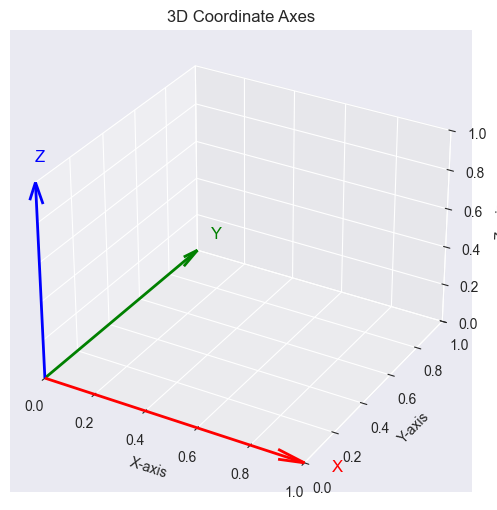

In [32]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Draw base coordinate axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', linewidth=2, arrow_length_ratio=0.1, label='X-axis')  # X-axis (Red)
ax.quiver(0, 0, 0, 0, 1, 0, color='g', linewidth=2, arrow_length_ratio=0.1, label='Y-axis')  # Y-axis (Green)
ax.quiver(0, 0, 0, 0, 0, 1, color='b', linewidth=2, arrow_length_ratio=0.1, label='Z-axis')  # Z-axis (Blue)

# Label the axes
ax.text(1.1, 0, 0, "X", color='r', fontsize=12)
ax.text(0, 1.1, 0, "Y", color='g', fontsize=12)
ax.text(0, 0, 1.1, "Z", color='b', fontsize=12)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Coordinate Axes')

# Show the plot
plt.show()

## 3D Rotating Cube (with Matplotlib and simple transformations)
Using single 3x3 rotation matrices to rotate a cube in 3D space.

In [2]:
# Define rotation matrices
def rotation_matrix_x(theta):
    return np.array([[1, 0, 0],
                     [0, np.cos(theta), -np.sin(theta)],
                     [0, np.sin(theta), np.cos(theta)]])

def rotation_matrix_y(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta)],
                     [0, 1, 0],
                     [-np.sin(theta), 0, np.cos(theta)]])

def rotation_matrix_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])

In [36]:
# Define cube vertices
vertices = np.array([[-1, -1, -1],
                     [1, -1, -1],
                     [1, 1, -1],
                     [-1, 1, -1],
                     [-1, -1, 1],
                     [1, -1, 1],
                     [1, 1, 1],
                     [-1, 1, 1]])

# Define cube faces
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]

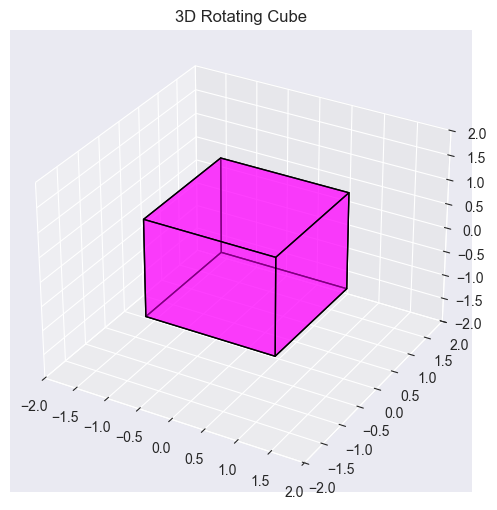

In [38]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.clear()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_title("3D Rotating Cube")
# Draw cube
ax.add_collection3d(Poly3DCollection(faces, facecolors='magenta', linewidths=1, edgecolors='black', alpha=0.5))

In [20]:
def update_ax(ax):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_title("3D Rotating Cube")

def render_vertices(ax, rotated_vertices):
    # Define new faces with rotated vertices
    rotated_faces = [[rotated_vertices[j] for j in [0, 1, 2, 3]],
                     [rotated_vertices[j] for j in [4, 5, 6, 7]],
                     [rotated_vertices[j] for j in [0, 1, 5, 4]],
                     [rotated_vertices[j] for j in [2, 3, 7, 6]],
                     [rotated_vertices[j] for j in [0, 3, 7, 4]],
                     [rotated_vertices[j] for j in [1, 2, 6, 5]]]
    # Draw cube
    ax.add_collection3d(Poly3DCollection(rotated_faces, facecolors='cyan', linewidths=1, edgecolors='black', alpha=0.5))

In [21]:
# Function to update the cube's rotation
def update_x(num):
    update_ax(ax)
    theta = np.radians(num)  # Convert degrees to radians
    # Apply rotation matrices
    rotated_vertices = np.dot(vertices, rotation_matrix_x(theta))
    render_vertices(ax, rotated_vertices)

In [22]:
def update_y(num):
    update_ax(ax)
    theta = np.radians(num)  # Convert degrees to radians
    # Apply rotation matrices
    rotated_vertices = np.dot(vertices, rotation_matrix_y(theta))
    # Draw cube
    render_vertices(ax, rotated_vertices)

In [23]:
def update_z(num):
    update_ax(ax)
    theta = np.radians(num)  # Convert degrees to radians
    # Apply rotation matrices
    rotated_vertices = np.dot(vertices, rotation_matrix_z(theta))
    # Draw cube
    render_vertices(ax, rotated_vertices)

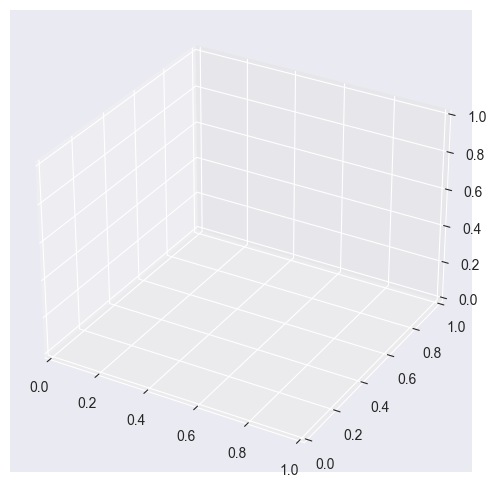

In [24]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# Create animation
ani = animation.FuncAnimation(fig, update_x, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [25]:
# Save animation as a gif
ani.save('cube_rotation_x.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


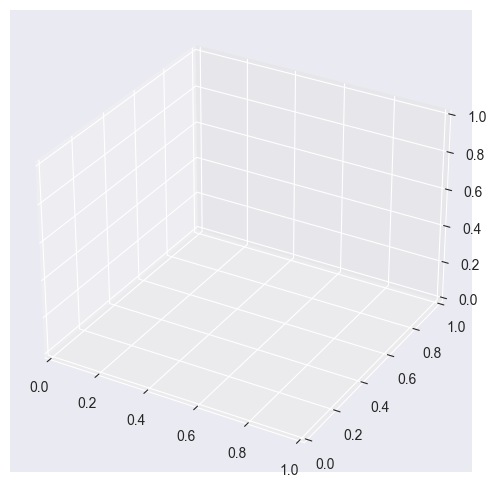

In [26]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# Create animation
ani = animation.FuncAnimation(fig, update_y, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [27]:
# Save animation as a gif
ani.save('cube_rotation_y.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


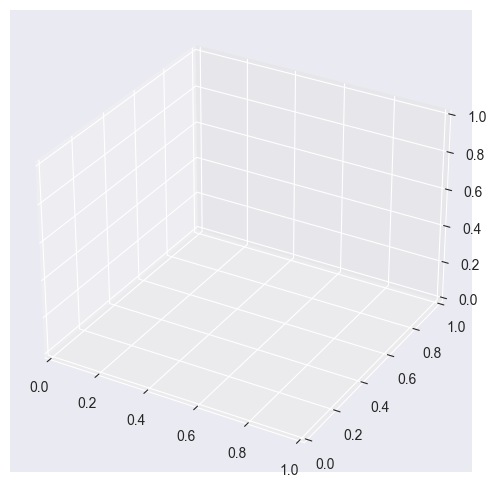

In [28]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# Create animation
ani = animation.FuncAnimation(fig, update_z, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [29]:
# Save animation as a gif
ani.save('cube_rotation_z.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


## Homogeneous Coordinates
Homogeneous coordinates are a system that allows representing points in a projective space. This system is used in computer graphics to perform transformations such as translation, rotation, scaling, and perspective projection.

In [44]:
# Define Homogeneous Transformation Matrices
def homogeneous_rotation_x(theta):
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta), np.cos(theta), 0],
                     [0, 0, 0, 1]])

def homogeneous_rotation_y(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                     [0, 1, 0, 0],
                     [-np.sin(theta), 0, np.cos(theta), 0],
                     [0, 0, 0, 1]])

def homogeneous_rotation_z(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0, 0],
                     [np.sin(theta), np.cos(theta), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

In [68]:
# Define Cube Vertices in Homogeneous Coordinates (Adding w=1)
vertices = np.array([[-1, -1, -1, 1],
                     [1, -1, -1, 1],
                     [1, 1, -1, 1],
                     [-1, 1, -1, 1],
                     [-1, -1, 1, 1],
                     [1, -1, 1, 1],
                     [1, 1, 1, 1],
                     [-1, 1, 1, 1]])

# Define Cube Faces
faces = [[vertices[j] for j in [0, 1, 2, 3]],
         [vertices[j] for j in [4, 5, 6, 7]],
         [vertices[j] for j in [0, 1, 5, 4]],
         [vertices[j] for j in [2, 3, 7, 6]],
         [vertices[j] for j in [0, 3, 7, 4]],
         [vertices[j] for j in [1, 2, 6, 5]]]

In [69]:
def get_faces(vertices):
    transformed_vertices = vertices[:, :3]
    faces = [[transformed_vertices[j] for j in [0, 1, 2, 3]],
             [transformed_vertices[j] for j in [4, 5, 6, 7]],
             [transformed_vertices[j] for j in [0, 1, 5, 4]],
             [transformed_vertices[j] for j in [2, 3, 7, 6]],
             [transformed_vertices[j] for j in [0, 3, 7, 4]],
             [transformed_vertices[j] for j in [1, 2, 6, 5]]]
    return faces

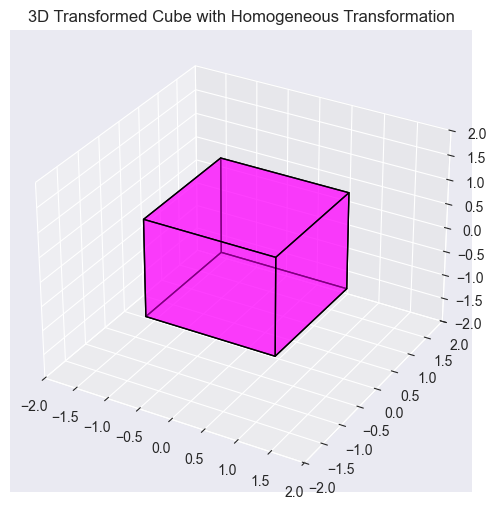

In [71]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.clear()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_title("3D Transformed Cube with Homogeneous Transformation")

# Convert homogeneous coordinates back to 3D by normalizing with w
faces = get_faces(vertices)

# Define cube faces

# Draw Transformed Cube
ax.add_collection3d(Poly3DCollection(faces, facecolors='magenta', linewidths=1, edgecolors='black', alpha=0.5))

# Show Plot
plt.show()

In [72]:
# Function to clear the axis
def update_ax(ax):
    ax.clear()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.set_title("3D Rotating Cube with Homogeneous Transformations")

In [74]:
# Function to render transformed cube
def render_vertices(ax, transformed_vertices):
    # Define new faces with transformed vertices
    transformed_faces = get_faces(transformed_vertices)
    # Draw cube
    ax.add_collection3d(Poly3DCollection(transformed_faces, facecolors='cyan', linewidths=1, edgecolors='black', alpha=0.5))


In [75]:
# Function to update rotation along X-axis
def update_x(num):
    update_ax(ax)
    theta = np.radians(num)  # Convert degrees to radians
    rotation_matrix = homogeneous_rotation_x(theta)
    transformed_vertices = np.dot(vertices, rotation_matrix.T)  # Apply homogeneous transformation
    render_vertices(ax, transformed_vertices)

# Function to update rotation along Y-axis
def update_y(num):
    update_ax(ax)
    theta = np.radians(num)
    rotation_matrix = homogeneous_rotation_y(theta)
    transformed_vertices = np.dot(vertices, rotation_matrix.T)
    render_vertices(ax, transformed_vertices)

# Function to update rotation along Z-axis
def update_z(num):
    update_ax(ax)
    theta = np.radians(num)
    rotation_matrix = homogeneous_rotation_z(theta)
    transformed_vertices = np.dot(vertices, rotation_matrix.T)
    render_vertices(ax, transformed_vertices)

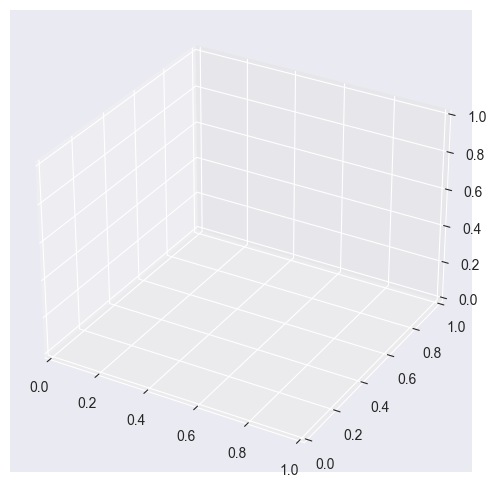

In [76]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create animation (Change update_x to update_y or update_z to rotate in different axes)
ani = animation.FuncAnimation(fig, update_x, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [77]:
# Save animation as a gif
ani.save('cube_rotation_homogeneous_x.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.


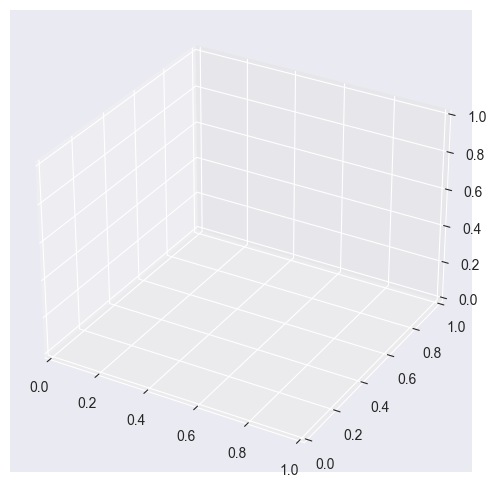

In [79]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create animation (Change update_x to update_y or update_z to rotate in different axes)
ani = animation.FuncAnimation(fig, update_y, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [80]:
# Save animation as a gif
ani.save('cube_rotation_homogeneous_y.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.
D:\dev\envs\hakiko-cyb\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


### Homogeneous transformation chain

In [81]:
def homogeneous_translation(tx, ty, tz):
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

def homogeneous_scaling(sx, sy, sz):
    return np.array([[sx, 0, 0, 0],
                     [0, sy, 0, 0],
                     [0, 0, sz, 0],
                     [0, 0, 0, 1]])

In [85]:
# Function to update rotation along Z-axis
def update_homogeneous_transformation(frame):
    """Update function for animation"""
    ax.clear()
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_title("3D Animated Cube with Homogeneous Transformations")

    # Compute Dynamic Transformations
    theta_x = np.radians(frame * 2)  # Rotate around X
    theta_y = np.radians(frame * 1.5)  # Rotate around Y
    scale = 1 + 0.5 * np.sin(np.radians(frame))  # Scale with oscillation
    tx = np.sin(np.radians(frame))  # Translate along X
    ty = np.cos(np.radians(frame))  # Translate along Y

    # Compute Transformation Matrix
    transformation_matrix = (
            homogeneous_translation(tx, ty, 0) @
            homogeneous_scaling(scale, scale, scale) @
            homogeneous_rotation_x(theta_x) @
            homogeneous_rotation_y(theta_y)
    )

    # Apply Transformation to Vertices
    transformed_vertices = np.dot(vertices, transformation_matrix.T)

    render_vertices(ax, transformed_vertices)


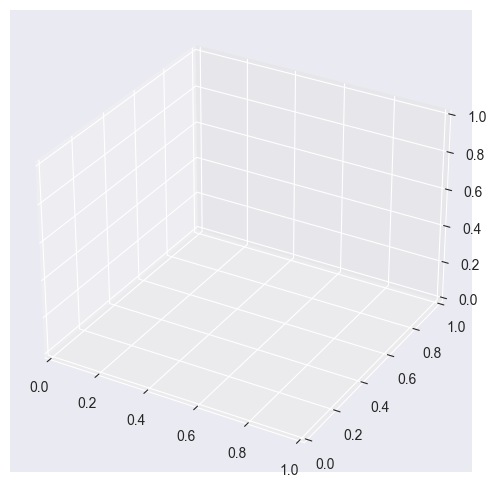

In [86]:
# Initialize figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create animation (Change update_x to update_y or update_z to rotate in different axes)
ani = animation.FuncAnimation(fig, update_homogeneous_transformation, frames=np.arange(0, 360, 5), interval=50)

plt.show()

In [87]:
# Save animation as a gif
ani.save('cube_homogeneous_transformation.gif', writer='imagemagick', fps=30)

MovieWriter imagemagick unavailable; using Pillow instead.
